# Medical Data Visualizer

## Data description
The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. You will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.    
File name: medical_examination.csv

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print('pd:', pd.__version__)
print('sns:', sns.__version__)
print('np:', np.__version__)

pd: 1.5.3
sns: 0.12.2
np: 1.24.2


In [24]:
### 111- Import data
df = pd.read_csv('medical_examination.csv')
print(df.shape)
display(df.head())
df.sample(10)

(70000, 13)


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
7813,11170,21997,1,148,65.0,160,90,3,3,0,0,0,1
30549,43670,21317,1,162,68.0,120,80,1,1,0,0,1,1
38616,55143,14734,1,152,47.0,110,70,1,1,0,0,1,0
36561,52228,19031,1,170,70.0,130,90,3,3,0,0,1,1
64070,91464,20215,2,159,60.0,150,90,1,1,0,0,1,1
56529,80685,18214,2,173,100.0,120,100,2,2,1,0,1,0
32240,46040,17445,1,157,89.0,110,80,2,1,0,0,1,0
28739,41080,19667,1,169,69.0,120,80,1,1,0,0,1,0
41533,59340,19218,1,164,77.0,126,85,1,1,0,0,1,0
32398,46276,19636,2,152,56.0,120,80,1,1,0,0,1,0


### References:
- age: objetive feature - int (days)
- sex: of - categorical code ?
- height: of - int (cm)
- weight: of - float (kg)
- ap_hi: examination feature - int - Systolic blood pressure
- ap_lo: ef - int - Diastolic blood pressure
- cholesterol: ef - 1: normal, 2: above normal, 3: well above normal
- gluc: ef - 1: , 2:, 3: idem cholesterol - Glucose
- smoke: subjective feature - binary
- alco: sf - binary - Alcohol intake - binary
- active: df - binary - Physical activity
- cardio: target variable - binary - Presence or absence of cardiovascular disease

chol: 52385 17615 70000
gluc: 59479 10521 70000
alco: 66236 3764 70000


<BarContainer object of 3 artists>

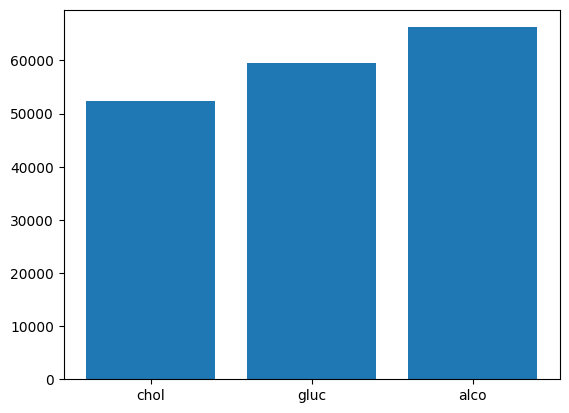

In [25]:
### 000- MBP - 
# 3 ways to count rows: .shape[0], len(df), len(df.index)

chol0_cnt = df.loc[df.cholesterol == 1].shape[0]
chol1_cnt = df.loc[df.cholesterol != 1].shape[0]
print('chol:', chol0_cnt, chol1_cnt, chol0_cnt + chol1_cnt)

gluc0_cnt = df.loc[df.gluc == 1].shape[0]
gluc1_cnt = df.loc[df.gluc != 1].shape[0]
print('gluc:', gluc0_cnt, gluc1_cnt, gluc0_cnt + gluc1_cnt)

alco0_cnt = df.loc[df.alco == 0].shape[0]
alco1_cnt = df.loc[df.alco == 1].shape[0]
print('alco:', alco0_cnt, alco1_cnt, alco0_cnt + alco1_cnt)

x = ['chol', 'gluc', 'alco']
y = [chol0_cnt, gluc0_cnt, alco0_cnt]

plt.bar(x, y)

In [26]:
card0_df = df.loc[df.cardio == 0]
card1_df = df.loc[df.cardio == 1]
print(card0_df.shape[0], card1_df.shape[0], card0_df.shape[0] + card1_df.shape[0])

card0_df.cholesterol.value_counts()

35021 34979 70000


1    29330
2     3799
3     1892
Name: cholesterol, dtype: int64

In [27]:
# mk values for cardio == 0

d0_chol0_cnt = card0_df.loc[df.cholesterol == 1].shape[0]
d0_chol1_cnt = card0_df.loc[df.cholesterol != 1].shape[0]
print('chol:', d0_chol0_cnt, d0_chol1_cnt, d0_chol0_cnt + d0_chol1_cnt)

d0_gluc0_cnt = card0_df.loc[df.gluc == 1].shape[0]
d0_gluc1_cnt = card0_df.loc[df.gluc != 1].shape[0]
print('gluc:', d0_gluc0_cnt, d0_gluc1_cnt, d0_gluc0_cnt + d0_gluc1_cnt)

d0_alco0_cnt = card0_df.loc[df.alco == 0].shape[0]
d0_alco1_cnt = card0_df.loc[df.alco == 1].shape[0]
print('alco:', d0_alco0_cnt, d0_alco1_cnt, d0_alco0_cnt + d0_alco1_cnt)

chol: 29330 5691 35021
gluc: 30894 4127 35021
alco: 33080 1941 35021


In [28]:
# mk values for cardio == 1

d1_chol0_cnt = card1_df.loc[df.cholesterol == 1].shape[0]
d1_chol1_cnt = card1_df.loc[df.cholesterol != 1].shape[0]
print('chol:', d1_chol0_cnt, d1_chol1_cnt, d1_chol0_cnt + d1_chol1_cnt)

d1_gluc0_cnt = card1_df.loc[df.gluc == 1].shape[0]
d1_gluc1_cnt = card1_df.loc[df.gluc != 1].shape[0]
print('gluc:', d1_gluc0_cnt, d1_gluc1_cnt, d1_gluc0_cnt + d1_gluc1_cnt)

d1_alco0_cnt = card1_df.loc[df.alco == 0].shape[0]
d1_alco1_cnt = card1_df.loc[df.alco == 1].shape[0]
print('alco:', d1_alco0_cnt, d1_alco1_cnt, d1_alco0_cnt + d1_alco1_cnt)

chol: 23055 11924 34979
gluc: 28585 6394 34979
alco: 33156 1823 34979


__________ Stop here to later make the datas for Multiple Bar Char Syde by Syde ____
- Details plots en multiple_bars.jpynb

### 222- Next Task: add overweight column
Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [29]:
# height_m (in m). = height / 100 = h * 0.01
newS1 = df.height * 0.01
newS1

# Sqr height_m = (height * 0.01) ** 2
newS2 = (df.height * 0.01) ** 2
newS2

# BMI = weight / (height * 0.01) ** 2
bmiS3 = df.weight / ((df.height * 0.01) ** 2)
bmiS3

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Length: 70000, dtype: float64

In [30]:
#df['bmi'] = df.weight / ((df.height * 0.01) ** 2)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [34]:
# conditional column creation:
    # 1. df[]= [1 if x > 25 else 0 for x in (df.weight / ((df.height * 0.01) ** 2))]    # Faster and most used
    # 2. df[] = np.where((df.weight / ((df.height * 0.01) ** 2)) > 25, 1, 0)
    # 3. df[] = df.bmi.map(lambda x: 1 if x > 25 else 0)       # with the auxiliary bmi column - NOT here

#df['overweight'] = [0 if x < 25 else 1 for x in df['bmi']]

df['overweight'] = [1 if x > 25 else 0 for x in df.weight / ((df.height * 0.01) ** 2)]
#df['overweight'] = np.where((df.weight / ((df.height * 0.01) ** 2)) > 25, 1, 0)


df


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


### 333- Normalize the data by making 0 always good and 1 always bad.
If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [37]:
# valid comment above about conditional 
df['cholesterol'] = df.cholesterol.map(lambda x: 0 if x == 1 else 1)
df['gluc'] = df.gluc.map(lambda x: 0 if x == 1 else 1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,0,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,0,0,0,0,1,1


### 444- Draw Categorical Plot
def draw_cat_plot():    
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.    
    df_cat = None

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = None    
    
    # Draw the catplot with 'sns.catplot()'    

    # Get the figure for the output    
    fig = None

    # Do not modify the next two lines    
    fig.savefig('catplot.png')    
    return fig


- https://seaborn.pydata.org/tutorial/data_structure.html    Long-form vs. Wide-form
- https://stackoverflow.com/questions/60625159/using-pandas-dataframe-melt-to-plot-data-with-seaborn
- https://stackoverflow.com/questions/51519101/
- https://pandas.pydata.org/docs/reference/api/pandas.melt.html
- https://pbpython.com/seaborn09.html
- https://datavizpyr.com/stripplot-using-seaborn-catplot/
- https://github.com/mwaskom/seaborn/issues/1702
